In [1]:
import warnings
warnings.filterwarnings('ignore')

## 6 学習に関するテクニック

### 6.1.2 SGD

In [2]:
class SGD:
    def __init__(self, lr = 0.01):
        self.lr = lr
    
    def update(self, params, grads):
        for key in params.key():
            params[key] -= self.lr * grads[key]

In [3]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # for simple contour line  
    mask = Z > 7
    Z[mask] = 0
    
    # plot 
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

<Figure size 640x480 with 1 Axes>

### 6.1.4 Momentum

In [4]:
class Momentum: 
    def __init__(self, lr = 0.01, momentum = 0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    
    def update(self, params, grads): 
        if self.v is None: 
            self.v = {}
            for key, val in params.item(): 
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys(): 
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

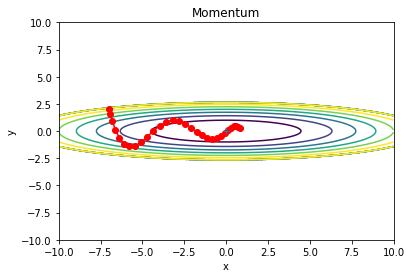

In [5]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["Momentum"] = Momentum(lr=0.1)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # for simple contour line  
    mask = Z > 7
    Z[mask] = 0
    
    # plot 
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

### 6.1.5 AdaGrad

In [6]:
class AdaGrad: 
    def __init__(self, lr = 0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads): 
        if self.h is None: 
            self.h - {}
            for key, val in params.items(): 
                self.h[key] = np.zeros_like(val)
                
            for key in params.key(): 
                self.h[key] += grads[key] * grads[key]
                params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7) # 1e-7は0割対策

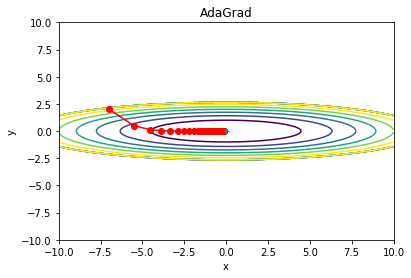

In [7]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["AdaGrad"] = AdaGrad(lr=1.5)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # for simple contour line  
    mask = Z > 7
    Z[mask] = 0
    
    # plot 
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

### 6.1.6 Adam

In [8]:
# Adam (http://arxiv.org/abs/1412.6980v8)
class Adam:

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

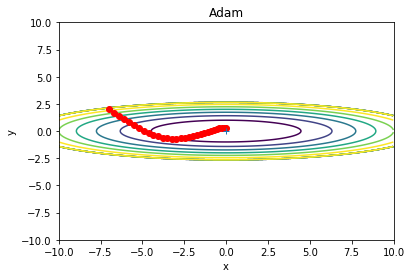

In [9]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # for simple contour line  
    mask = Z > 7
    Z[mask] = 0
    
    # plot 
    # plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

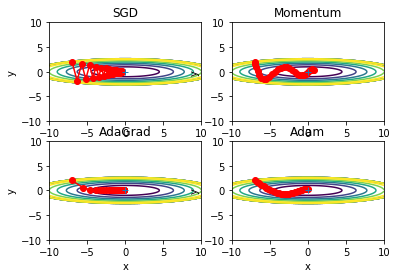

In [10]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # for simple contour line  
    mask = Z > 7
    Z[mask] = 0
    
    # plot 
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

### 6.1.8 MNISTデータセットによる更新手法の比較

===========iteration:0===========
SGD:2.2486802737863982
Momentum:2.453789177755085
AdaGrad:2.420647760757479
Adam:2.223795235912352
===========iteration:100===========
SGD:1.570754251409919
Momentum:0.39138477449283715
AdaGrad:0.17877984981144682
Adam:0.3164853143225049
===========iteration:200===========
SGD:0.88758651094589
Momentum:0.4242245106042707
AdaGrad:0.19133357906239296
Adam:0.29532917764512234
===========iteration:300===========
SGD:0.5146623802471886
Momentum:0.2603022972775324
AdaGrad:0.1520625914622019
Adam:0.19816203378781436
===========iteration:400===========
SGD:0.3502191525459364
Momentum:0.12970094484233652
AdaGrad:0.058166285806488756
Adam:0.09443369960620158
===========iteration:500===========
SGD:0.27128606437513736
Momentum:0.09374709182434204
AdaGrad:0.03904031968410484
Adam:0.08451471772296175
===========iteration:600===========
SGD:0.3231324915417149
Momentum:0.24271639643236773
AdaGrad:0.10551778468289523
Adam:0.13226536545080875
===========iteration:700==

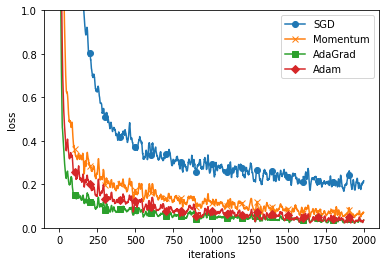

In [11]:
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

## 6.2 重みの初期値

### 6.2.2 隠れ層のアクティベーション分布

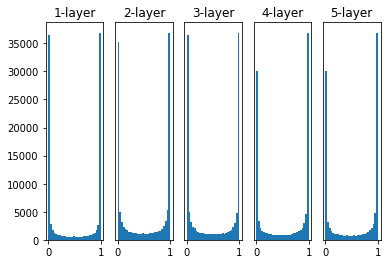

In [12]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100          # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5   # 隠れ層が5層
activations = {}        # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    w = np.random.randn(node_num, node_num) * 1        # σ = 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

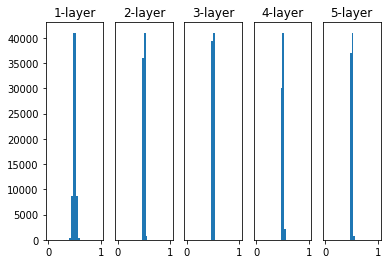

In [13]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100          # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5   # 隠れ層が5層
activations = {}        # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    # w = np.random.randn(node_num, node_num) * 1
    w = np.random.randn(node_num, node_num) * 0.01       # σ = 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

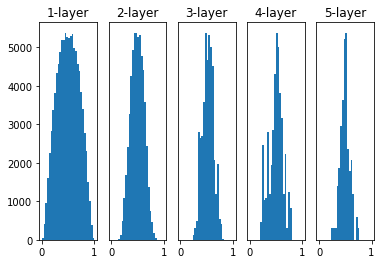

In [14]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100          # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5   # 隠れ層が5層
activations = {}        # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    # w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)   # Xavierの初期値
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

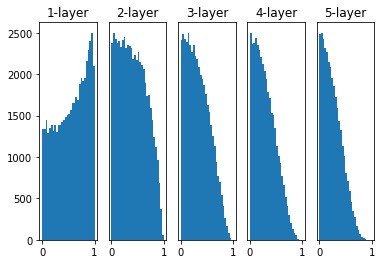

In [15]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100          # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5   # 隠れ層が5層
activations = {}        # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    # w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)   # Xavierの初期値
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    # z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

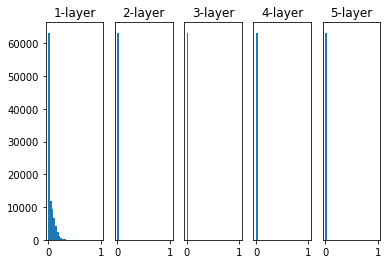

In [16]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100          # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5   # 隠れ層が5層
activations = {}        # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    # w = np.random.randn(node_num, node_num) * 1 
    w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    # z = sigmoid(a)
    z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

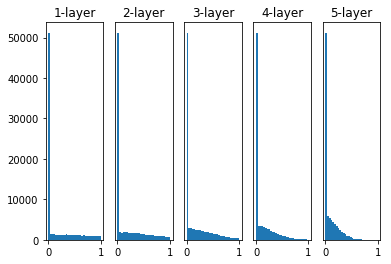

In [17]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100          # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5   # 隠れ層が5層
activations = {}        # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    # w = np.random.randn(node_num, node_num) * 1 
    # w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)   # Xavierの初期値
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num) # Heの初期値


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    # z = sigmoid(a)
    z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

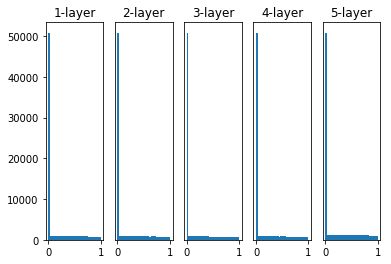

In [18]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100          # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5   # 隠れ層が5層
activations = {}        # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    # w = np.random.randn(node_num, node_num) * 1 
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)   # Xavierの初期値
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)  # Heの初期値


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    # z = sigmoid(a)
    z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

===========iteration:0===========
std=0.01:2.3024871750472564
Xavier:2.2898044593958202
He:2.3205908140807407
===========iteration:100===========
std=0.01:2.3020937133057164
Xavier:2.2435425355230265
He:1.3129185346374896
===========iteration:200===========
std=0.01:2.3020912998016443
Xavier:2.1443323062527
He:0.6738173143741504
===========iteration:300===========
std=0.01:2.30382185781444
Xavier:1.9196660778588366
He:0.5244352466641682
===========iteration:400===========
std=0.01:2.302403541223955
Xavier:1.410615729951746
He:0.4007552697473296
===========iteration:500===========
std=0.01:2.3004540332798804
Xavier:0.8060037744931354
He:0.3095618526824637
===========iteration:600===========
std=0.01:2.2983878725030715
Xavier:0.7741962357930948
He:0.42246591734509503
===========iteration:700===========
std=0.01:2.300235171086264
Xavier:0.5485028937500376
He:0.296084034739969
===========iteration:800===========
std=0.01:2.2987047986739073
Xavier:0.4902789675681041
He:0.26253364595206696
=

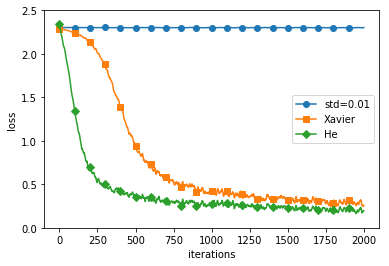

In [19]:
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

## 6.3 Batch Normalization

### 6.3.2 Batch Normalizationの評価

============== 1/16 ==============
epoch:0 | 0.116 - 0.151
epoch:1 | 0.097 - 0.168
epoch:2 | 0.097 - 0.152
epoch:3 | 0.097 - 0.185
epoch:4 | 0.097 - 0.206
epoch:5 | 0.097 - 0.228
epoch:6 | 0.097 - 0.243
epoch:7 | 0.097 - 0.257
epoch:8 | 0.097 - 0.279
epoch:9 | 0.097 - 0.3
epoch:10 | 0.097 - 0.314
epoch:11 | 0.097 - 0.336
epoch:12 | 0.097 - 0.351
epoch:13 | 0.097 - 0.357
epoch:14 | 0.097 - 0.376
epoch:15 | 0.097 - 0.399
epoch:16 | 0.097 - 0.399
epoch:17 | 0.097 - 0.412
epoch:18 | 0.097 - 0.426


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.443
============== 2/16 ==============
epoch:0 | 0.097 - 0.101
epoch:1 | 0.097 - 0.112
epoch:2 | 0.097 - 0.156
epoch:3 | 0.097 - 0.173
epoch:4 | 0.097 - 0.199
epoch:5 | 0.097 - 0.227
epoch:6 | 0.097 - 0.257
epoch:7 | 0.097 - 0.282
epoch:8 | 0.097 - 0.305
epoch:9 | 0.097 - 0.327
epoch:10 | 0.097 - 0.35
epoch:11 | 0.097 - 0.38
epoch:12 | 0.097 - 0.394
epoch:13 | 0.097 - 0.42
epoch:14 | 0.097 - 0.444
epoch:15 | 0.097 - 0.464
epoch:16 | 0.097 - 0.474
epoch:17 | 0.097 - 0.496
epoch:18 | 0.097 - 0.499


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.515
============== 3/16 ==============
epoch:0 | 0.112 - 0.05
epoch:1 | 0.291 - 0.089
epoch:2 | 0.439 - 0.121
epoch:3 | 0.564 - 0.146
epoch:4 | 0.643 - 0.187
epoch:5 | 0.681 - 0.222
epoch:6 | 0.739 - 0.261
epoch:7 | 0.791 - 0.297
epoch:8 | 0.815 - 0.328
epoch:9 | 0.861 - 0.368
epoch:10 | 0.873 - 0.403
epoch:11 | 0.891 - 0.425
epoch:12 | 0.905 - 0.466
epoch:13 | 0.924 - 0.494
epoch:14 | 0.934 - 0.508
epoch:15 | 0.946 - 0.535
epoch:16 | 0.953 - 0.557
epoch:17 | 0.958 - 0.579
epoch:18 | 0.965 - 0.595


No handles with labels found to put in legend.


epoch:19 | 0.97 - 0.617
============== 4/16 ==============
epoch:0 | 0.104 - 0.101
epoch:1 | 0.339 - 0.126
epoch:2 | 0.491 - 0.233
epoch:3 | 0.538 - 0.318
epoch:4 | 0.64 - 0.373
epoch:5 | 0.67 - 0.432
epoch:6 | 0.699 - 0.477
epoch:7 | 0.728 - 0.513
epoch:8 | 0.741 - 0.54
epoch:9 | 0.758 - 0.569
epoch:10 | 0.769 - 0.608
epoch:11 | 0.788 - 0.638
epoch:12 | 0.799 - 0.665
epoch:13 | 0.814 - 0.688
epoch:14 | 0.81 - 0.714
epoch:15 | 0.844 - 0.735
epoch:16 | 0.844 - 0.748
epoch:17 | 0.862 - 0.759
epoch:18 | 0.857 - 0.774


No handles with labels found to put in legend.


epoch:19 | 0.87 - 0.795
============== 5/16 ==============
epoch:0 | 0.082 - 0.075
epoch:1 | 0.079 - 0.137
epoch:2 | 0.078 - 0.321
epoch:3 | 0.076 - 0.446
epoch:4 | 0.073 - 0.536
epoch:5 | 0.081 - 0.614
epoch:6 | 0.081 - 0.683
epoch:7 | 0.088 - 0.714
epoch:8 | 0.101 - 0.741
epoch:9 | 0.12 - 0.769
epoch:10 | 0.137 - 0.789
epoch:11 | 0.146 - 0.806
epoch:12 | 0.164 - 0.825
epoch:13 | 0.189 - 0.838
epoch:14 | 0.208 - 0.845
epoch:15 | 0.224 - 0.854
epoch:16 | 0.233 - 0.857
epoch:17 | 0.262 - 0.871
epoch:18 | 0.273 - 0.874


No handles with labels found to put in legend.


epoch:19 | 0.29 - 0.888
============== 6/16 ==============
epoch:0 | 0.098 - 0.1
epoch:1 | 0.084 - 0.162
epoch:2 | 0.084 - 0.427
epoch:3 | 0.117 - 0.598
epoch:4 | 0.116 - 0.681
epoch:5 | 0.116 - 0.74
epoch:6 | 0.116 - 0.768
epoch:7 | 0.116 - 0.794
epoch:8 | 0.116 - 0.812
epoch:9 | 0.116 - 0.83
epoch:10 | 0.116 - 0.851
epoch:11 | 0.116 - 0.866
epoch:12 | 0.121 - 0.876
epoch:13 | 0.118 - 0.891
epoch:14 | 0.101 - 0.904
epoch:15 | 0.113 - 0.914
epoch:16 | 0.116 - 0.93
epoch:17 | 0.116 - 0.937
epoch:18 | 0.116 - 0.942


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.953
============== 7/16 ==============
epoch:0 | 0.092 - 0.097
epoch:1 | 0.116 - 0.317
epoch:2 | 0.116 - 0.567
epoch:3 | 0.116 - 0.686
epoch:4 | 0.116 - 0.742
epoch:5 | 0.116 - 0.783
epoch:6 | 0.116 - 0.82
epoch:7 | 0.116 - 0.86
epoch:8 | 0.116 - 0.88
epoch:9 | 0.116 - 0.892
epoch:10 | 0.116 - 0.907
epoch:11 | 0.116 - 0.919
epoch:12 | 0.116 - 0.944
epoch:13 | 0.116 - 0.957
epoch:14 | 0.116 - 0.963
epoch:15 | 0.116 - 0.971
epoch:16 | 0.116 - 0.976
epoch:17 | 0.116 - 0.983
epoch:18 | 0.116 - 0.986


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.991
============== 8/16 ==============
epoch:0 | 0.117 - 0.146
epoch:1 | 0.099 - 0.355
epoch:2 | 0.099 - 0.749
epoch:3 | 0.116 - 0.847
epoch:4 | 0.105 - 0.887
epoch:5 | 0.116 - 0.911
epoch:6 | 0.116 - 0.939
epoch:7 | 0.116 - 0.949
epoch:8 | 0.117 - 0.968
epoch:9 | 0.116 - 0.976
epoch:10 | 0.116 - 0.985
epoch:11 | 0.116 - 0.989
epoch:12 | 0.116 - 0.992
epoch:13 | 0.116 - 0.994
epoch:14 | 0.117 - 0.995
epoch:15 | 0.117 - 0.997
epoch:16 | 0.117 - 0.997
epoch:17 | 0.117 - 0.997
epoch:18 | 0.117 - 0.997


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.998
============== 9/16 ==============
epoch:0 | 0.097 - 0.113
epoch:1 | 0.105 - 0.366
epoch:2 | 0.117 - 0.632
epoch:3 | 0.117 - 0.76
epoch:4 | 0.117 - 0.826
epoch:5 | 0.117 - 0.875
epoch:6 | 0.117 - 0.911
epoch:7 | 0.117 - 0.929
epoch:8 | 0.117 - 0.967
epoch:9 | 0.117 - 0.982
epoch:10 | 0.117 - 0.99
epoch:11 | 0.117 - 0.994
epoch:12 | 0.117 - 0.995
epoch:13 | 0.117 - 0.991
epoch:14 | 0.117 - 0.995
epoch:15 | 0.117 - 0.998
epoch:16 | 0.117 - 0.998
epoch:17 | 0.117 - 0.998
epoch:18 | 0.117 - 0.979


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.999
============== 10/16 ==============
epoch:0 | 0.116 - 0.075
epoch:1 | 0.117 - 0.516
epoch:2 | 0.117 - 0.74
epoch:3 | 0.117 - 0.797
epoch:4 | 0.117 - 0.79
epoch:5 | 0.116 - 0.858
epoch:6 | 0.116 - 0.884
epoch:7 | 0.116 - 0.944
epoch:8 | 0.116 - 0.964
epoch:9 | 0.116 - 0.969
epoch:10 | 0.116 - 0.987
epoch:11 | 0.116 - 0.988
epoch:12 | 0.117 - 0.989
epoch:13 | 0.117 - 0.992
epoch:14 | 0.117 - 0.981
epoch:15 | 0.117 - 0.995
epoch:16 | 0.117 - 0.996
epoch:17 | 0.117 - 0.996
epoch:18 | 0.117 - 0.997


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.997
============== 11/16 ==============
epoch:0 | 0.116 - 0.137
epoch:1 | 0.116 - 0.675
epoch:2 | 0.116 - 0.492
epoch:3 | 0.116 - 0.851
epoch:4 | 0.116 - 0.814
epoch:5 | 0.117 - 0.935
epoch:6 | 0.116 - 0.947
epoch:7 | 0.116 - 0.933
epoch:8 | 0.116 - 0.964
epoch:9 | 0.117 - 0.954
epoch:10 | 0.117 - 0.982
epoch:11 | 0.117 - 0.985
epoch:12 | 0.117 - 0.988
epoch:13 | 0.117 - 0.991
epoch:14 | 0.117 - 0.992
epoch:15 | 0.117 - 0.993
epoch:16 | 0.117 - 0.995
epoch:17 | 0.117 - 0.935
epoch:18 | 0.117 - 0.993


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.961
============== 12/16 ==============
epoch:0 | 0.097 - 0.097
epoch:1 | 0.105 - 0.584
epoch:2 | 0.117 - 0.633
epoch:3 | 0.105 - 0.688
epoch:4 | 0.105 - 0.753
epoch:5 | 0.117 - 0.766
epoch:6 | 0.117 - 0.778
epoch:7 | 0.117 - 0.837
epoch:8 | 0.116 - 0.84
epoch:9 | 0.116 - 0.838
epoch:10 | 0.117 - 0.872
epoch:11 | 0.117 - 0.862
epoch:12 | 0.117 - 0.874
epoch:13 | 0.117 - 0.885
epoch:14 | 0.117 - 0.889
epoch:15 | 0.117 - 0.887
epoch:16 | 0.117 - 0.753
epoch:17 | 0.117 - 0.892
epoch:18 | 0.117 - 0.895


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.896
============== 13/16 ==============
epoch:0 | 0.117 - 0.103
epoch:1 | 0.117 - 0.462
epoch:2 | 0.117 - 0.48
epoch:3 | 0.117 - 0.499
epoch:4 | 0.117 - 0.594
epoch:5 | 0.117 - 0.602
epoch:6 | 0.117 - 0.609
epoch:7 | 0.117 - 0.606
epoch:8 | 0.117 - 0.613
epoch:9 | 0.117 - 0.609
epoch:10 | 0.117 - 0.639
epoch:11 | 0.117 - 0.66
epoch:12 | 0.117 - 0.64
epoch:13 | 0.117 - 0.621
epoch:14 | 0.117 - 0.621
epoch:15 | 0.117 - 0.599
epoch:16 | 0.117 - 0.673
epoch:17 | 0.117 - 0.711
epoch:18 | 0.117 - 0.716


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.717
============== 14/16 ==============
epoch:0 | 0.097 - 0.1
epoch:1 | 0.105 - 0.5
epoch:2 | 0.105 - 0.418
epoch:3 | 0.116 - 0.511
epoch:4 | 0.116 - 0.543
epoch:5 | 0.116 - 0.543
epoch:6 | 0.116 - 0.585
epoch:7 | 0.116 - 0.599
epoch:8 | 0.116 - 0.599
epoch:9 | 0.116 - 0.613
epoch:10 | 0.116 - 0.606
epoch:11 | 0.116 - 0.611
epoch:12 | 0.116 - 0.616
epoch:13 | 0.116 - 0.576
epoch:14 | 0.116 - 0.622
epoch:15 | 0.116 - 0.615
epoch:16 | 0.116 - 0.622
epoch:17 | 0.116 - 0.627
epoch:18 | 0.116 - 0.63


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.625
============== 15/16 ==============
epoch:0 | 0.093 - 0.143
epoch:1 | 0.116 - 0.34
epoch:2 | 0.116 - 0.385
epoch:3 | 0.116 - 0.466
epoch:4 | 0.116 - 0.458
epoch:5 | 0.117 - 0.481
epoch:6 | 0.116 - 0.492
epoch:7 | 0.116 - 0.509
epoch:8 | 0.116 - 0.522
epoch:9 | 0.116 - 0.506
epoch:10 | 0.116 - 0.527
epoch:11 | 0.116 - 0.515
epoch:12 | 0.116 - 0.528
epoch:13 | 0.116 - 0.515
epoch:14 | 0.116 - 0.526
epoch:15 | 0.116 - 0.523
epoch:16 | 0.116 - 0.529
epoch:17 | 0.116 - 0.529
epoch:18 | 0.116 - 0.528


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.529
============== 16/16 ==============
epoch:0 | 0.117 - 0.163
epoch:1 | 0.116 - 0.207
epoch:2 | 0.116 - 0.28
epoch:3 | 0.116 - 0.372
epoch:4 | 0.116 - 0.403
epoch:5 | 0.116 - 0.406
epoch:6 | 0.117 - 0.489
epoch:7 | 0.116 - 0.47
epoch:8 | 0.116 - 0.507
epoch:9 | 0.116 - 0.507
epoch:10 | 0.116 - 0.489
epoch:11 | 0.116 - 0.508
epoch:12 | 0.116 - 0.509
epoch:13 | 0.116 - 0.51
epoch:14 | 0.116 - 0.511
epoch:15 | 0.116 - 0.51
epoch:16 | 0.116 - 0.51
epoch:17 | 0.116 - 0.496
epoch:18 | 0.116 - 0.514
epoch:19 | 0.116 - 0.512


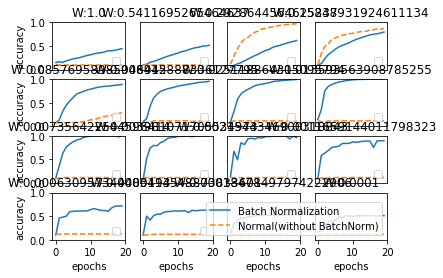

In [20]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 学習データを削減
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 3.グラフの描画==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

## 6.4 正規化